In [1]:
import tensorflow as tf 
from tensorflow import keras
import matplotlib.pyplot as plt 
import numpy as np

LOADING DATASET

In [11]:
images_ds_healthy = tf.data.Dataset.list_files('PlantVillage/Potato___healthy/*')
images_ds_Eblight = tf.data.Dataset.list_files('PlantVillage/Potato___Early_blight/*')
images_ds_Lblight = tf.data.Dataset.list_files('PlantVillage/Potato___Late_blight/*')

In [12]:
ds = images_ds_healthy.concatenate(images_ds_Eblight)
ds = ds.concatenate(images_ds_Lblight)
ds = ds.shuffle(2152,seed=3)

In [13]:
def get_label(file_path):
    import os
    str1 = tf.strings.split(file_path, os.path.sep)[-1]
    str2 = tf.strings.split(str1, '_')[-1]
    str3 = tf.strings.split(str2, ' ')[0]
    return str3

In [14]:
def process_image(file_path):
    label = get_label(file_path)

    img = tf.io.read_file(file_path)
    img = tf.image.decode_jpeg(img)
    img = tf.image.resize(img, [128, 128])
    img = img / 255

    return img, label

In [15]:
X = []
y_0 = []
for image, label in ds.map(process_image):
    X.append(image)
    y_0.append(label)

In [16]:
y = []
y_classes = ['Healthy','Early Blight','Late Blight']
for i in range(len(y_0)):
    if y_0[i].numpy().decode('utf-8') == 'LB':
        y.append(2)
    elif y_0[i].numpy().decode('utf-8') == 'HL':
        y.append(0)
    elif y_0[i].numpy().decode('utf-8') == 'Early.B':
        y.append(1)

In [17]:
X = np.array(X)
y = np.array(y)
print('X shape: ',X.shape)
print('len y: ',len(y))

X shape:  (2152, 128, 128, 3)
len y:  2152


In [18]:
def plot_image(X, y, index):
    plt.figure(figsize=(15,2))
    plt.matshow(X[index])
    plt.xlabel(y_classes[y[index]])

<Figure size 1500x200 with 0 Axes>

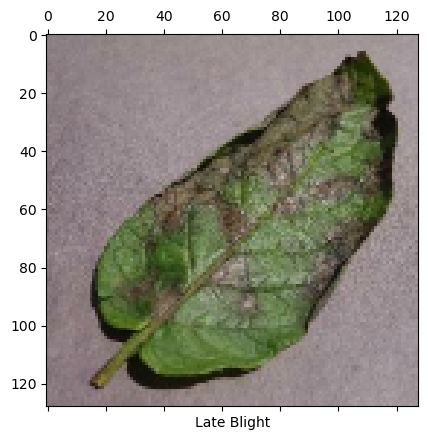

In [33]:
plot_image(X_train, y_train, 12)

TRAIN_TEST_SPLIT

In [20]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [21]:
print(f'X_train shape: {X_train.shape}')
print(f'X_test shape: {X_test.shape}')
print(f'y_train length: {len(y_train)}')
print(f'y_test length: {len(y_test)}')

X_train shape: (1721, 128, 128, 3)
X_test shape: (431, 128, 128, 3)
y_train length: 1721
y_test length: 431


In [26]:
y_train[:100]

array([2, 1, 1, 1, 2, 2, 2, 1, 1, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1,
       2, 2, 2, 2, 1, 0, 1, 1, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 2, 1, 2, 2, 1, 2, 2, 2, 0, 2, 2, 2, 2, 1, 1, 2, 2, 1, 1, 1, 2,
       2, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 1, 1, 2, 2, 1, 1, 0, 1, 2, 2, 2,
       0, 1, 1, 2, 0, 2, 1, 1, 1, 2, 1, 2])

Building Model

In [27]:
num_classes = 3

In [45]:
alex1 = keras.Sequential([
    keras.layers.Conv2D(filters=96,kernel_size=11,strides=4, activation='relu'),
    keras.layers.MaxPooling2D(pool_size=3, strides=2),
    keras.layers.Conv2D(filters=256, kernel_size=5, strides=1,padding='same',activation='relu'),
    keras.layers.MaxPooling2D(pool_size=3, strides=2),
    keras.layers.Conv2D(filters=384, kernel_size=3, strides=1,padding='same',activation='relu'),
    keras.layers.Conv2D(filters=384, kernel_size=3, strides=1,padding='same',activation='relu'),
    keras.layers.Conv2D(filters=256, kernel_size=3, strides=1,padding='same', activation='relu'),
    keras.layers.MaxPooling2D(pool_size=3, strides=2),
    keras.layers.Dropout(0.3),

    keras.layers.Flatten(),
    keras.layers.Dense(4096, activation='relu'),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(4096, activation='relu'),
    keras.layers.Dense(num_classes, activation = 'softmax')
])

alex1.compile(optimizer='SGD',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])

In [47]:
alex1.fit(X_train, y_train, epochs=50)

Epoch 1/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 9s 171ms/step - accuracy: 0.7124 - loss: 0.6949
Epoch 2/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 9s 174ms/step - accuracy: 0.7367 - loss: 0.6608
Epoch 3/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 10s 177ms/step - accuracy: 0.7152 - loss: 0.6705
Epoch 4/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 9s 175ms/step - accuracy: 0.7621 - loss: 0.5894
Epoch 5/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 10s 180ms/step - accuracy: 0.7650 - loss: 0.5816
Epoch 6/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 10s 180ms/step - accuracy: 0.8031 - loss: 0.5124
Epoch 7/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 10s 179ms/step - accuracy: 0.7944 - loss: 0.5041
Epoch 8/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 10s 180ms/step - accuracy: 0.8065 - loss: 0.4732
Epoch 9/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 10s 179ms/step - accuracy: 0.7990 - loss: 0.4867
Epoch 10/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 10s 177ms/step - accuracy: 0.8196 - loss: 0.4191
Epoch 11/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 10s 176ms/step - accuracy: 0.8331 - loss: 0.3913
Epoch 12/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 9s 17

14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 52ms/step


array([[1.6950697e-05, 9.9507910e-01, 9.9775618e-01],
       [1.6333514e-06, 9.9999809e-01, 5.7104999e-01],
       [1.8405987e-02, 5.0394690e-01, 9.8869979e-01],
       ...,
       [5.3228196e-05, 9.9997866e-01, 3.2710829e-01],
       [8.8936788e-01, 1.3058875e-02, 9.2297399e-01],
       [6.8753753e-11, 1.0000000e+00, 5.4239477e-03]], dtype=float32)

In [49]:
from sklearn.metrics import classification_report 
y_pred = alex1.predict(X_test)
y_pred = [np.argmax(i) for i in y_pred]

print('Classifiation_report: ')
print(classification_report(y_test, y_pred))

14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step
Classifiation_report: 
              precision    recall  f1-score   support

           0       0.93      0.93      0.93        29
           1       0.98      0.97      0.97       217
           2       0.96      0.96      0.96       185

    accuracy                           0.97       431
   macro avg       0.95      0.96      0.96       431
weighted avg       0.97      0.97      0.97       431



CONCLUSION

I try model with smaller drop-out probability because of the size of image is 
equal to a half a the size images in based dataset.